In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../results/all_cooccurring_mutations.csv")
df['method'] = 'VILOCA'

df_lofreq = pd.read_csv("../../results/all_lofreq.csv")
df_lofreq['method'] = 'LoFreq'

# INFO field to dataframe
info_strings = '{"' + df_lofreq.INFO.str.split(';').str.join('","').str.replace('=','":"').str.replace("\"\",", "") + '"}'
info_df = pd.json_normalize(info_strings.apply(eval))
df_lofreq = pd.concat([df_lofreq, info_df], axis=1)
df_lofreq = df_lofreq.rename(columns={"POS": "position", "REF": "ref", "ALT": "var", "AF": "freq"})

df = pd.concat([df, df_lofreq])
df = df[['start', 'end', 'coverage', 'position', 'ref', 'var', 'freq', 'support',
       'sample', 'patient', 'time', 'method']]

df['mutation_label'] = df['ref']+df['position'].astype(str)+df['var']
df['time'] = df['time'].str.split('_').str[1].astype(int)

In [3]:
# load coverage 
df_coverage = pd.read_csv("../../results/all_coverage.csv")
df_coverage['patient'] = df_coverage['sample'].str.split('/').str[0]
df_coverage['time'] = df_coverage['sample'].str.split('/').str[1].str.split('_').str[1].astype(int)

In [4]:
patient_id = 'CAP257' 

df_plot = df[df['patient']==patient_id]
df_plot['mutation_label'] = df_plot['ref']+df_plot['position'].astype(str)+df_plot['var']

df_plot = df_plot.pivot_table(index=['mutation_label', 'position'], 
                        values='freq',
                        columns='time',
                        aggfunc='mean',
                        fill_value=0,
                       ).reset_index()

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_31960/3587274389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['mutation_label'] = df_plot['ref']+df_plot['position'].astype(str)+df_plot['var']
/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_31960/3587274389.py:6: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_plot = df_plot.pivot_table(index=['mutation_label', 'position'],


Text(0.5, 54.5, 'weeks post-infection')

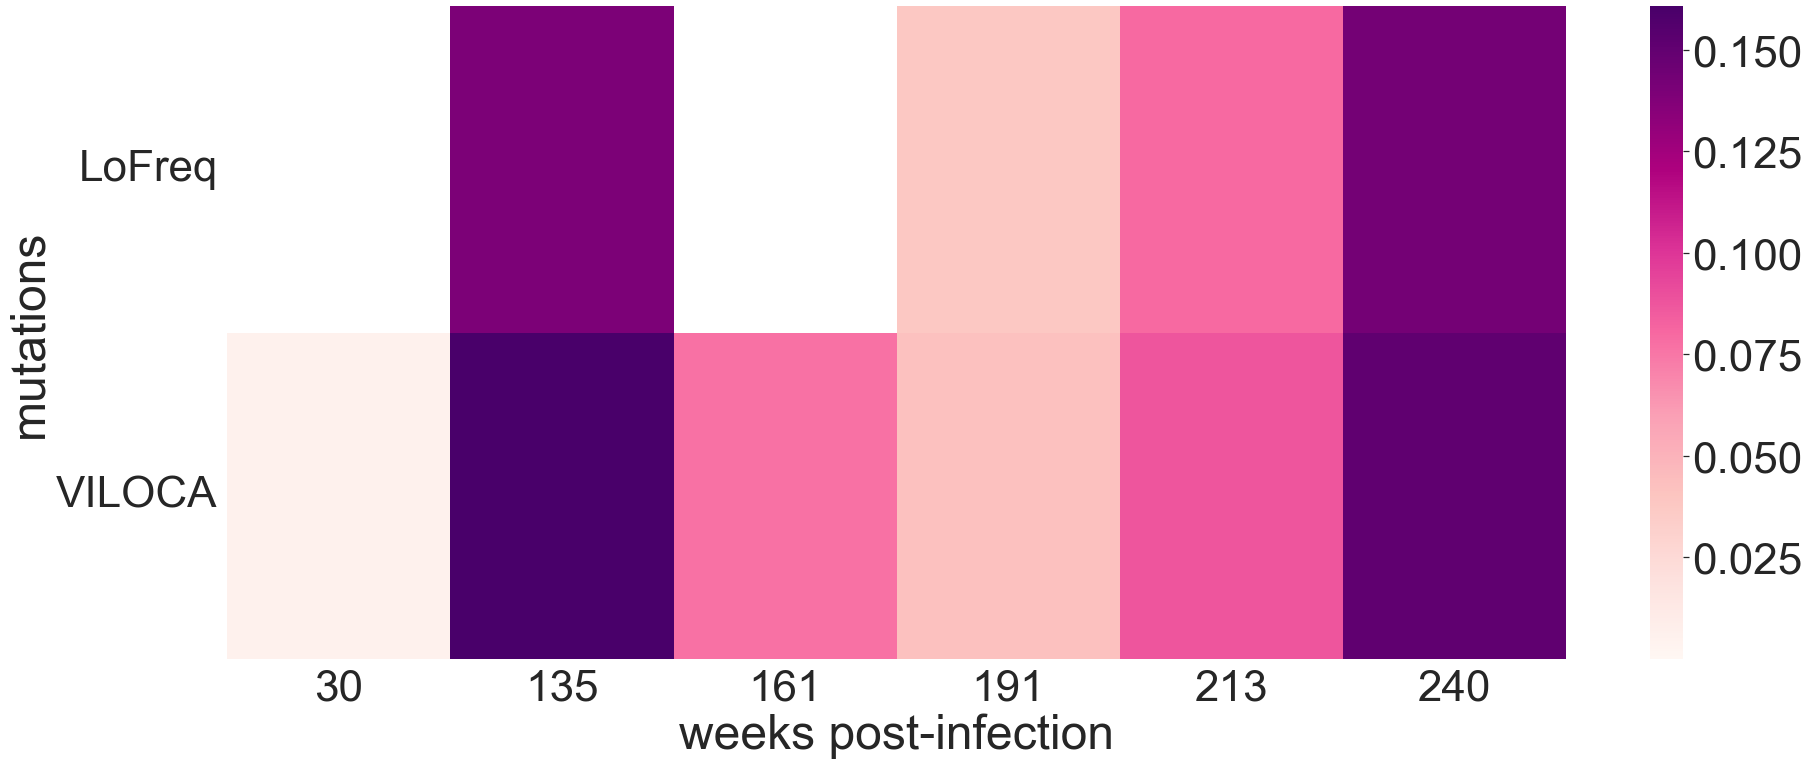

In [5]:
patient_id = 'CAP257'

df_coverage = df_coverage[df_coverage['patient']==patient_id]
df_plot = df[df['patient']==patient_id]

mut_label_interest = [
    'C982T', 
]
df_plot = df_plot[df_plot['mutation_label'].isin(mut_label_interest)]
df_plot = df_plot.sort_values(['time'])

df_plot = df_plot.pivot_table(index=['method', 'position'], 
                        values='freq',
                        columns='time',
                        aggfunc='mean',
                        fill_value=0,
                       ).reset_index()

df_plot = pd.melt(df_plot, 
               id_vars=['method', 'position'], 
               var_name='time', 
               value_name='freq')


df_plot = pd.merge(df_plot, df_coverage[['pos', 'time', 'coverage']], 
                left_on = ['time', 'position'], 
                right_on= ['time', 'pos'])


#df_plot.loc[df_plot['coverage']<10, 'freq'] = np.nan


df_plot = df_plot.pivot_table(index='method', 
                        values='freq',
                        columns='time',
                        aggfunc='mean',
                       ).reindex()


fig = plt.figure(figsize = (30, 12))

sns.set(font_scale=4)

import matplotlib as mpl
cmap = mpl.cm.get_cmap("RdPu").copy()
cmap.set_under(color='white')

ax = fig.add_subplot(111)
sns.heatmap(df_plot,
            cmap=cmap, 
            vmin=0.000001,
            )
ax.tick_params(axis='y', rotation=0)
ax.set_ylabel('mutations')
ax.set_xlabel('weeks post-infection')

#fig.savefig('heatmap_application_hiv_lofreq_vs_viloca.svg')

In [6]:
df_plot

time,30,135,161,191,213,240
method,,,,,,
LoFreq,0.000000,0.139535,0.000000,0.038265,0.080000,0.142570
VILOCA,0.005181,0.160714,0.076923,0.042493,0.087379,0.150901


In [9]:
# get posterior values of VILOCA
df

,start,end,coverage,position,ref,var,freq,support,sample,patient,time,method,mutation_label
0,805.0,1005.0,2134.0,808,G,A,0.203966,1.0,results,CAP206,254,VILOCA,G808A
1,805.0,1005.0,2134.0,814,A,C,1.0,1.0,results,CAP206,254,VILOCA,A814C
2,805.0,1005.0,2134.0,816,C,A,1.0,1.0,results,CAP206,254,VILOCA,C816A
3,805.0,1005.0,2134.0,819,G,C,0.034466,1.0,results,CAP206,254,VILOCA,G819C
4,805.0,1005.0,2134.0,821,G,A,1.0,1.0,results,CAP206,254,VILOCA,G821A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27642,NaN,NaN,NaN,8504,G,A,0.962025,NaN,results,CAP287,9,LoFreq,G8504A
27643,NaN,NaN,NaN,8514,T,A,0.962025,NaN,results,CAP287,9,LoFreq,T8514A
27644,NaN,NaN,NaN,8534,C,A,0.985915,NaN,results,CAP287,9,LoFreq,C8534A
27645,NaN,NaN,NaN,8730,G,A,0.954545,NaN,results,CAP287,9,LoFreq,G8730A


In [13]:
df[(df['patient']==patient_id)
  &(df['mutation_label']=="C982T")
  &(df['method']=="VILOCA")][['mutation_label', 'time','freq', 'support']].sort_values('time')

,mutation_label,time,freq,support
11091,C982T,30,0.005181,0.963748
18262,C982T,135,0.160714,0.995209
17580,C982T,161,0.076923,0.965601
16757,C982T,191,0.042493,1.000000
16165,C982T,213,0.087379,1.000000
15338,C982T,240,0.150901,1.000000
